In [1]:
import numpy as np
import numpy.linalg
import scipy as sc
from scipy.optimize import minimize_scalar, minimize
from scipy.misc import derivative
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas
%matplotlib notebook
#%matplotlib inline

# CMT Seminar - "Mixed Phases in Mean Field Theory"

## Model Parameter

### Hopping

In [2]:
t = ((1.0,0.0))

### Hubbard Repulsion

In [3]:
U = 5.0

## Bandstructure

\begin{equation}
\epsilon\left(\vec{k}\right) = -2t\left( \cos{(k_x)} + \cos{(k_y)} \right) - 4t'\cos{(k_x)}\cos{(k_y)}
\end{equation}

In [4]:
def Bandstructure(k, t):
    k_x = k[0]
    k_y = k[1]
    
    t_1 = t[0]
    t_2 = t[1]
    
    return -2.0 * t_1 * (np.cos(k_x) + np.cos(k_y) ) - 4.0 * t_2 * np.cos(k_x) * np.cos(k_y)

<IPython.core.display.Javascript object>


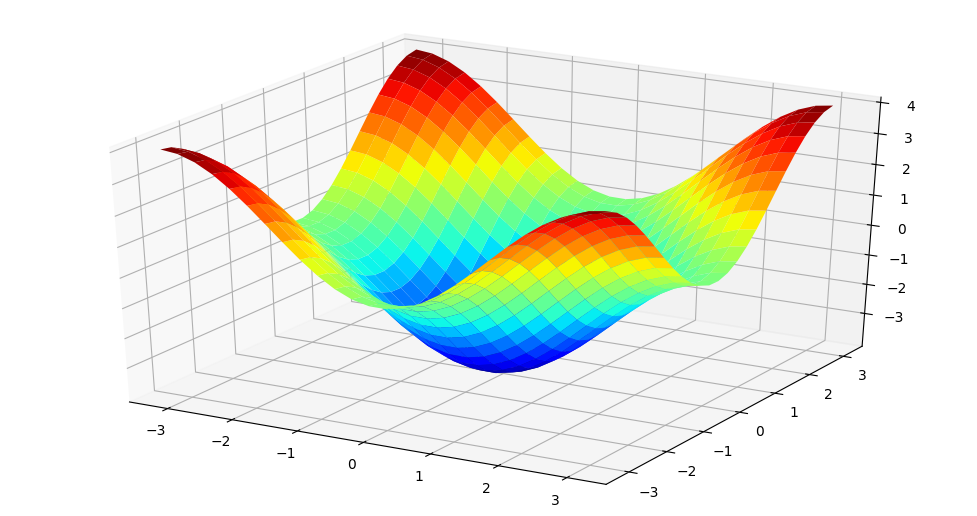

In [5]:
fig_bandstructure = plt.figure()
ax = Axes3D(fig_bandstructure)
kx = np.arange(-np.pi, np.pi, 0.25)
ky = np.arange(-np.pi, np.pi, 0.25)
kx, ky = np.meshgrid(kx, ky)

E = Bandstructure((kx,ky), t)
ax.plot_surface(kx, ky, E, rstride=1, cstride=1, cmap=cm.jet)

plt.show()

## Mean-Field Parameter

##### AFM

Density: $q_i = q$,

Fermion Spin: $\vec{m}_i = m_{AF}(-1)^{i_x + i_y}\vec{e}_z$ 

##### FM

Density: $q_i = q$, 

Fermion Spin: $\vec{m}_i = m_{F}\vec{e}_z$

##### PM

Density: $q_i = q$,

Fermion spin: $\vec{m}_i = \vec{0}$

## Eigenenergies of the one-particle Hamiltonian

##### AFM

\begin{equation}
E^{\text{AFM}}_{\pm} \left(\vec{k}\right) = \frac{1}{2} \left[ \epsilon\left(\vec{k}\right) + \epsilon\left(\vec{k}+\vec{Q}\right) \right] + \frac{U}{2}\left(q-1\right)-\mu \pm \frac{1}{2} \sqrt{\left[ \epsilon\left(\vec{k}\right) + \epsilon\left(\vec{k}+\vec{Q}\right) \right]^2 + (Um_{\text{AFM}})^2}\quad\text{with}\quad\vec{Q} = (\pi,\pi)
\end{equation}

In [7]:
def E_afm_1(k, t, U, mu, q, m):
    kx_Q = k[0] + np.pi
    ky_Q = k[1] + np.pi

    return    0.5 * ( Bandstructure(k, t) + Bandstructure((kx_Q,ky_Q), t)) + 0.5*U*(q-1.0) - mu\
            - 0.5 * np.sqrt( ( Bandstructure(k, t) - Bandstructure((kx_Q,ky_Q), t))**2 + (U*m)**2 )

def E_afm_2(k, t, U, mu, q, m):
    kx_Q = k[0] + np.pi
    ky_Q = k[1] + np.pi
    
    return    0.5 * ( Bandstructure(k, t) + Bandstructure((kx_Q,ky_Q), t)) + 0.5*U*(q-1.0) - mu\
            + 0.5 * np.sqrt( ( Bandstructure(k, t) - Bandstructure((kx_Q,ky_Q), t))**2 + (U*m)**2 )

<IPython.core.display.Javascript object>


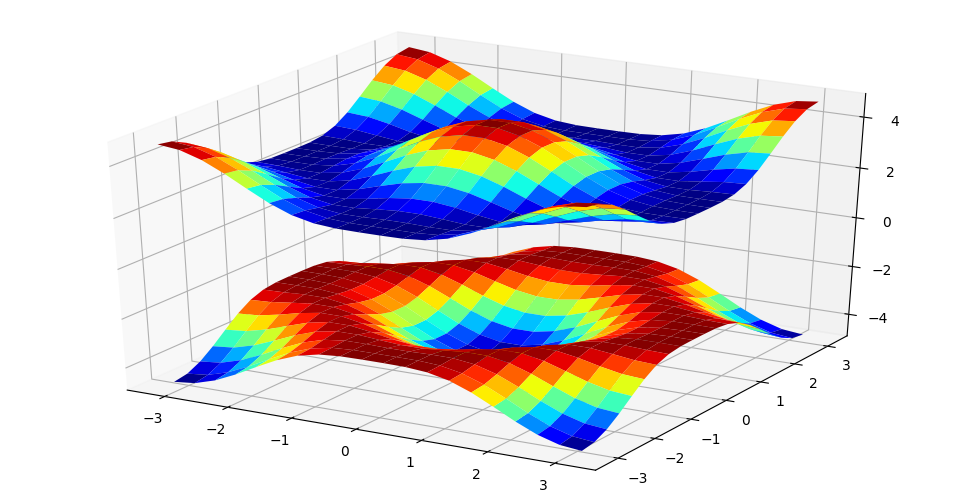

In [8]:
fig_afm_bandstructure = plt.figure()
ax = Axes3D(fig_afm_bandstructure)
kx = np.linspace(-np.pi, np.pi, 20, endpoint=True)
ky = np.linspace(-np.pi, np.pi, 20, endpoint=True)
kx, ky = np.meshgrid(kx, ky)

E1 = E_afm_1((kx,ky), t, U, 0.0, 1.0, 1.0)
E2 = E_afm_2((kx,ky), t, U, 0.0, 1.0, 1.0)

ax.plot_surface(kx, ky, E1, rstride=1, cstride=1, cmap=cm.jet)
ax.plot_surface(kx, ky, E2, rstride=1, cstride=1, cmap=cm.jet)

plt.show()

##### FM

\begin{equation}
E^{\text{FM}}_{\pm} \left(\vec{k}\right) = \epsilon\left(\vec{k}\right) + \frac{U}{2}\left(q-1 \pm m_{\text{FM}} \right)-\mu
\end{equation}

In [9]:
def E_fm_1(k, t, U, mu, q, m):
    return Bandstructure(k, t) + 0.5*U*(q-1.0 - m) - mu

def E_fm_2(k, t, U, mu, q, m):
    return Bandstructure(k, t) + 0.5*U*(q-1.0 + m) - mu

<IPython.core.display.Javascript object>


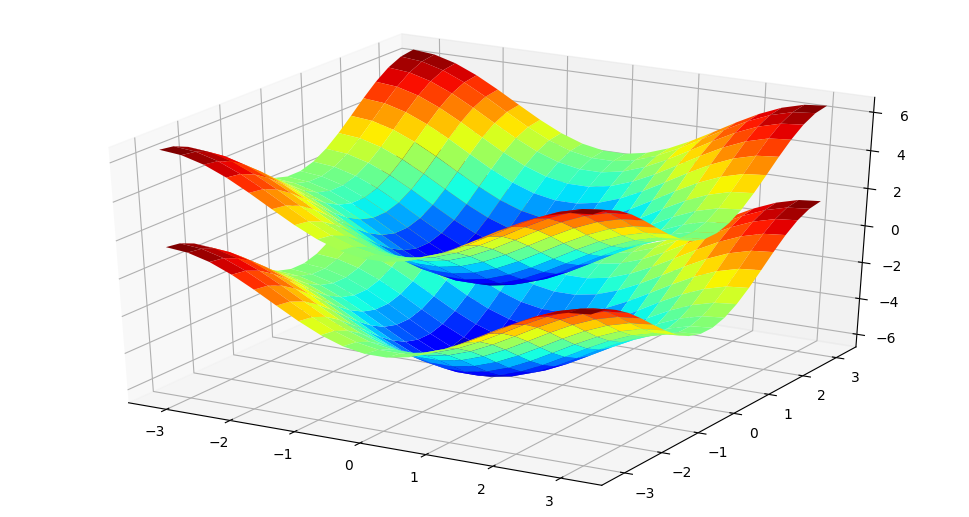

In [10]:
fig_fm_bandstructure = plt.figure()
ax = Axes3D(fig_fm_bandstructure)
kx = np.linspace(-np.pi, np.pi, 20, endpoint=True)
ky = np.linspace(-np.pi, np.pi, 20, endpoint=True)
kx, ky = np.meshgrid(kx, ky)

E1 = E_fm_1((kx,ky), t, U, 0.0, 1.0, 1.0)
E2 = E_fm_2((kx,ky), t, U, 0.0, 1.0, 1.0)

ax.plot_surface(kx, ky, E1, rstride=1, cstride=1, cmap=cm.jet)
ax.plot_surface(kx, ky, E2, rstride=1, cstride=1, cmap=cm.jet)

plt.show()

#####  PM

\begin{equation}
E^{\text{PM}}_{\pm} \left(\vec{k}\right) = \epsilon\left(\vec{k}\right) + \frac{U}{2}\left(q-1\right)-\mu
\end{equation}

In [11]:
def E_pm_1(k, t, U, mu, q, m=0):
    return Bandstructure(k, t) + 0.5*U*(q-1.0) - mu

def E_pm_2(k, t, U, mu, q, m=0):
    return Bandstructure(k, t) + 0.5*U*(q-1.0) - mu

<IPython.core.display.Javascript object>


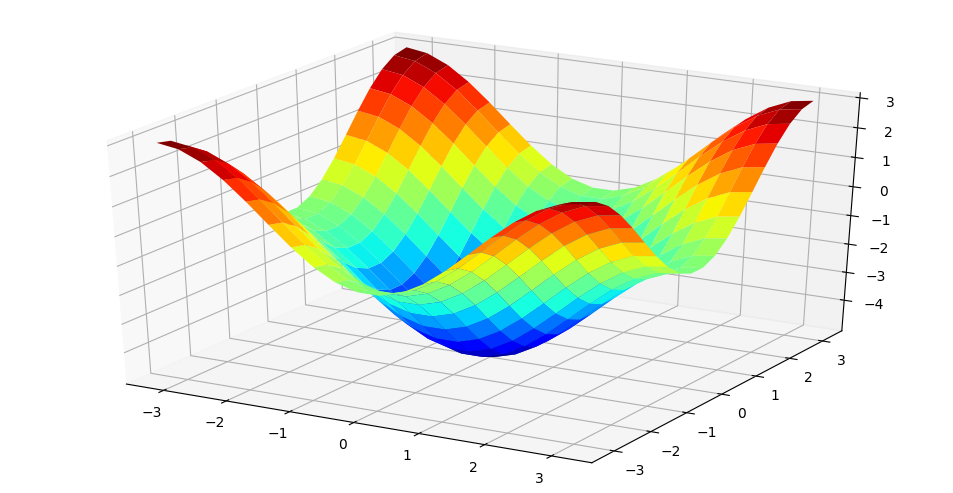

In [12]:
fig_pm_bandstructure = plt.figure()
ax = Axes3D(fig_pm_bandstructure)
kx = np.linspace(-np.pi, np.pi, 20, endpoint=True)
ky = np.linspace(-np.pi, np.pi, 20, endpoint=True)
kx, ky = np.meshgrid(kx, ky)

E1 = E_pm_1((kx,ky), t, U, 1.0, 1.0, 1.0)

ax.plot_surface(kx, ky, E1, rstride=1, cstride=1, cmap=cm.jet)

plt.show()

## Landau Functionals

\begin{equation}
\mathcal{F}_{X} = \frac{U}{4}\left(m^{2}_{X} - (q-1)^2 \right) - \frac{1}{\beta L^2} \sum_{\vec{k}, \varepsilon=\pm} \log{\left(\cosh{\left(\frac{\beta}{2} E^{\text{X}}_{\varepsilon} \left( \vec{k} \right) \right) }\right)}
\end{equation}

In [13]:
beta = 1000 # beta = 1.0 / kT
L = 60       # Nr. of Lattice Sites/k-points in discretized 1. Brillouin Zine 

##### AFM

In [14]:
def F_afm(q, m, t, U, mu):
    kx_grid = np.linspace(-np.pi, np.pi, L, endpoint=False)
    ky_grid = np.linspace(-np.pi, np.pi, L, endpoint=False)

    summe = 0
    
    for kx in kx_grid:
        for ky in ky_grid:
            X = 0.5*beta*E_afm_1((kx,ky), (t[0],t[1]), U, mu, q, m)
            summe += np.sign(X)*X - np.log(2) + np.log( np.exp(-2.0*np.sign(X)*X) + 1.0)
            X = 0.5*beta*E_afm_2((kx,ky), (t[0],t[1]), U, mu, q, m)
            summe += np.sign(X)*X - np.log(2) + np.log( np.exp(-2.0*np.sign(X)*X) + 1.0)    
    
    return 0.25 * U * (m**2 - (q - 1)**2) - (1.0 / (beta*L**2)) * summe

#### FM

In [15]:
def F_fm(q, m, t, U, mu):
    kx_grid = np.linspace(-np.pi, np.pi, L, endpoint=False)
    ky_grid = np.linspace(-np.pi, np.pi, L, endpoint=False)
    
    summe = 0
    
    for kx in kx_grid:
        for ky in ky_grid:
            X = 0.5*beta*E_fm_1((kx,ky), (t[0],t[1]), U, mu, q, m)
            summe += np.sign(X)*X - np.log(2) + np.log( np.exp(-2.0*np.sign(X)*X) + 1.0)
            X = 0.5*beta*E_fm_2((kx,ky), (t[0],t[1]), U, mu, q, m)
            summe += np.sign(X)*X - np.log(2) + np.log( np.exp(-2.0*np.sign(X)*X) + 1.0)
    
    return 0.25 * U * (m**2 - (q - 1)**2) - (1.0 / (beta*L**2)) * summe

#### PM

In [16]:
#Notice: according to assumption m = 0, and will not used as argument in def
def F_pm(q, t, U, mu):
    kx_grid = np.linspace(-np.pi, np.pi, L, endpoint=False)
    ky_grid = np.linspace(-np.pi, np.pi, L, endpoint=False)
    
    summe = 0
    
    for kx in kx_grid:
        for ky in ky_grid:
            X = 0.5*beta*E_pm_1((kx,ky), t, U, mu, q)
            summe += np.sign(X)*X - np.log(2) + np.log( np.exp(-2.0*np.sign(X)*X) + 1.0)
            X = 0.5*beta*E_pm_2((kx,ky), t, U, mu, q)
            summe += np.sign(X)*X - np.log(2) + np.log( np.exp(-2.0*np.sign(X)*X) + 1.0)    
    
    return 0.25 * U * ( - (q - 1)**2) - (1.0 / (beta*L**2)) * summe

## Plots of the Landau Functionals

<IPython.core.display.Javascript object>


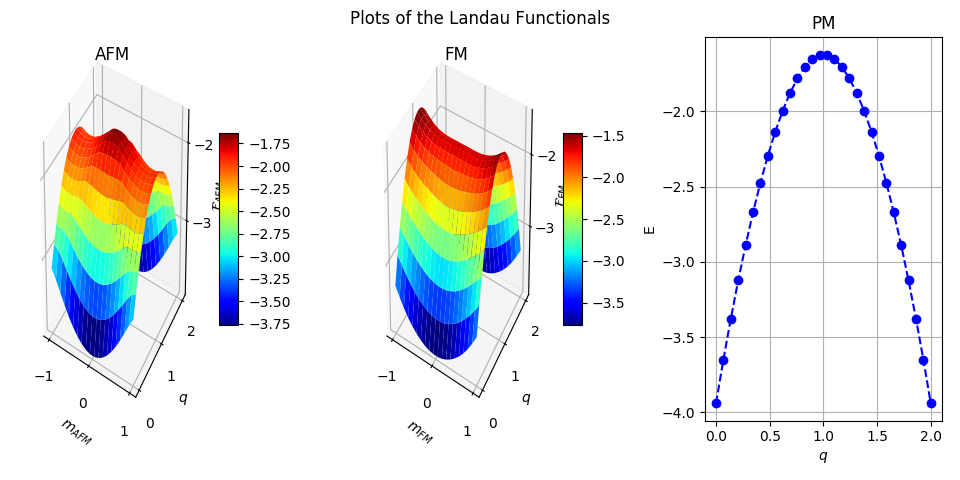

In [17]:
fig_LFs = plt.figure(figsize=plt.figaspect(0.5))
fig_LFs.suptitle('Plots of the Landau Functionals')

#AFM
ax = fig_LFs.add_subplot(1, 3, 1, projection='3d')

ax.set_title("AFM")
ax.set_xlabel("$m_{AFM}$")
ax.set_ylabel("$q$")
ax.set_zlabel("$\mathcal{F}_{AFM}$")

m = np.linspace(-1.0, 1.0, 20, endpoint=True)
q = np.linspace(0.0, 2.0, 20, endpoint=True)
m, q = np.meshgrid(m, q)

Z = F_afm(q, m, t, U, 0.0)

surf = ax.plot_surface(m, q, Z, rstride=1, cstride=1, cmap=cm.jet)
fig_LFs.colorbar(surf, shrink=0.5, aspect=10)

#FM
ax = fig_LFs.add_subplot(1, 3, 2, projection='3d')

ax.set_title("FM")
ax.set_xlabel("$m_{FM}$")
ax.set_ylabel("$q$")
ax.set_zlabel("$\mathcal{F}_{FM}$")

m = np.linspace(-1.0, 1.0, 20, endpoint=True)
q = np.linspace(0.0, 2.0, 20, endpoint=True)
m, q = np.meshgrid(m, q)

Z = F_fm(q, m, t, U, 0.0)

surf = ax.plot_surface(m, q, Z, rstride=1, cstride=1, cmap=cm.jet)
fig_LFs.colorbar(surf, shrink=0.5, aspect=10)

#PM
ax = fig_LFs.add_subplot(1, 3, 3)

ax.set_title("PM")
ax.set_xlabel("$q$")
ax.set_ylabel("$\mathcal{F}_{PM}$")

q = np.linspace(0.0, 2.0, 30, endpoint=True)

ax.plot(q, F_pm(q, t, U, 0.0), 'bo--')

ax.grid(True)
ax.set_ylabel('E')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


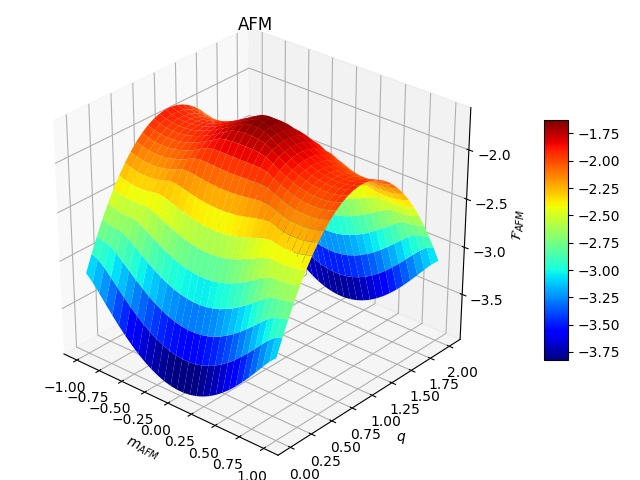

In [48]:
fig_LFs = plt.figure(figsize=plt.figaspect(0.75))
ax = Axes3D(fig_LFs)

ax.set_title("AFM")
ax.set_xlabel("$m_{AFM}$")
ax.set_ylabel("$q$")
ax.set_zlabel("$\mathcal{F}_{AFM}$")

m = np.linspace(-1.0, 1.0, 30, endpoint=True)
q = np.linspace(0.0, 2.0, 30, endpoint=True)
m, q = np.meshgrid(m, q)

Z = F_afm(q, m, t, U, 0.0)

surf = ax.plot_surface(m, q, Z, rstride=1, cstride=1,  cmap=cm.jet)
fig_LFs.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

<IPython.core.display.Javascript object>


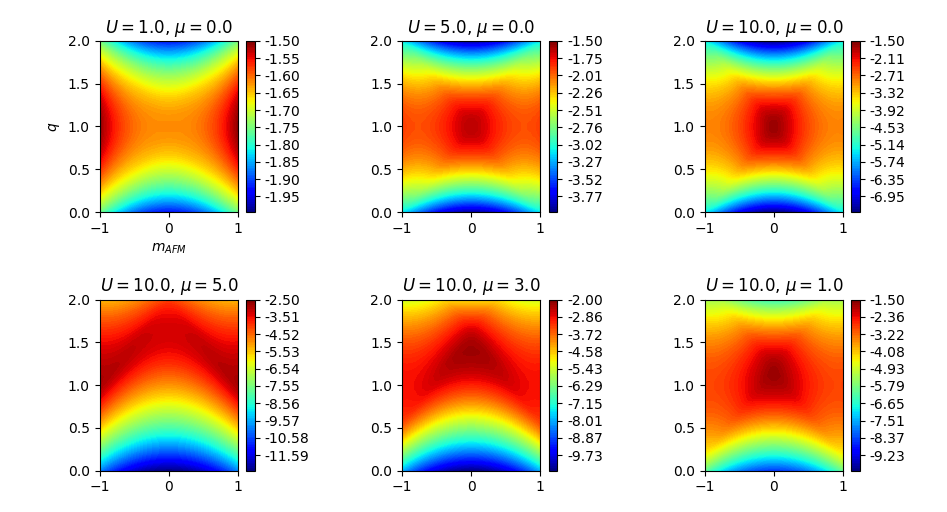

In [47]:
fig, axs = plt.subplots(2,3)

m = np.linspace(-1.0, 1.0, 30, endpoint=True)
q = np.linspace(0.0, 2.0, 30, endpoint=True)
m, q = np.meshgrid(m, q)

axs[0][0].set_title("$U = 1.0$, $\mu = 0.0$")
axs[0][0].set_xlabel("$m_{AFM}$")
axs[0][0].set_ylabel("$q$")

Z = F_afm(q, m, t, 1.0, 0.0)
levels = np.linspace(-2.0, -1.5, 100)

cs = axs[0][0].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[0][0], format="%.2f")

axs[0][1].set_title("$U = 5.0$, $\mu = 0.0$")

Z = F_afm(q, m, t, 5.0, 0.0)
levels = np.linspace(-4, -1.5, 100)

cs = axs[0][1].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[0][1], format="%.2f")

axs[0][2].set_title("$U = 10.0$, $\mu = 0.0$")

Z = F_afm(q, m, t, 10.0, 0.0)
levels = np.linspace(-7.5, -1.5, 100)

cs = axs[0][2].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[0][2], format="%.2f")

axs[1][0].set_title("$U = 10.0$, $\mu = 5.0$")

Z = F_afm(q, m, t, 10.0, 5.0)
levels = np.linspace(-12.5, -2.5, 100)

cs = axs[1][0].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[1][0], format="%.2f")

axs[1][1].set_title("$U = 10.0$, $\mu = 3.0$")

Z = F_afm(q, m, t, 10.0, 3.0)
levels = np.linspace(-10.5, -2.0, 100)

cs = axs[1][1].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[1][1], format="%.2f")

axs[1][2].set_title("$U = 10.0$, $\mu = 1.0$")

Z = F_afm(q, m, t, 10.0, 1.0)
levels = np.linspace(-10.0, -1.5, 100)

cs = axs[1][2].contourf(m, q, Z, levels=levels, cmap=cm.jet)
fig.colorbar(cs, ax=axs[1][2], format="%.2f")

plt.tight_layout()
plt.show()

## Saddle Point Search

Maximize F with respect to q for fixed m and then fix q at found max. and minimize F with respect to m.
Repeat until convergence

In [ ]:
def F_afm_max_for_q(q, m, t, U, mu):
    return -F_afm(q, m, t, U, mu)
def F_afm_min_for_m(m, q, t, U, mu):
    return F_afm(q, m, t, U, mu)

def F_fm_max_for_q(q, m, t, U, mu):
    return -F_fm(q, m, t, U, mu)
def F_fm_min_for_m(m, q, t, U, mu):
    return F_fm(q, m, t, U, mu)

def F_pm_max_for_q(q, t, U, mu):
    return -F_pm(q, t, U, mu)

In [ ]:
mu_array = np.linspace(-4.0, 4.0, 81, endpoint=True)
result_afm = np.zeros((0,4))
result_fm = np.zeros((0,4))
result_pm = np.zeros((0,3))
m_global_guess = 1.0
q_global_guess = 1.0

In [ ]:
def free_energy_afm(mu, t, U):
    global result_afm
    global m_global_guess
    global q_global_guess
    
    m_old = 2.0
    m_new = m_global_guess

    q_old = 8.0
    q_new = q_global_guess

    eps = 1e-2

    max_run = 10
    i = 0
    
    old_mag_arr = np.zeros(2)
    
    print("WhileLoop:", sep=' ', end ="\n", flush=True)
    
    no_saddle_point = False
    
    while i < max_run and (np.fabs(m_old - m_new) > eps or np.fabs(q_old - q_new) > eps):
        
        i = i + 1
        print(i, sep=' ', end =" ", flush=True)

        print(q_new, sep=' ', end = " ", flush=True)
        print(m_new, sep=' ', end = " ", flush=True)
        
        q_old = q_new
        result_max_for_q = minimize(F_afm_max_for_q, 1.0, args=(m_new, t, U, mu), method='trust-ncg', tol=1e-8)
        q_new = result_max_for_q.x
        print(q_new, sep=' ', end = " ", flush=True)
        
        m_old = m_new
        result_min_for_m = minimize(F_afm_min_for_m, 1.0, args=(q_new, t, U, mu), method='trust-ncg', tol=1e-8)
        m_new = result_min_for_m.x
        print(m_new, sep=' ', end = " ", flush=True)
        
        if (np.fabs(m_new-old_mag_arr[1]) < 1e-5) and np.fabs(m_new - old_mag_arr[0]) > 0.5:
            m_new = 0.5*(old_mag_arr[0] + old_mag_arr[1]) 
            print('\n found 2 loop', m_new)
            #no_saddle_point = True
            #break
    
        old_mag_arr[1] = old_mag_arr[0]
        old_mag_arr[0] = m_new
        
        print( F_afm(q_new, m_new, t, U, mu), end = "\n", flush=True)

    if(not no_saddle_point):
        F = F_afm(q_new, m_new, t, U, mu)
        m_global_guess = m_new
        q_global_guess = q_new
        result_afm = np.vstack([result_afm,[mu,q_new,m_new,F]])
    else:
        F = 0
        q_new = 0
        m_new = 0
        result_afm = np.vstack([result_afm,[mu,q_new,m_new,F]])
    
    print("\nMu: {0:3.3f}, q: {1:3.3f}, m: {2:3.3f}, F: {3:3.3f}\n\n".format(mu, q_new, m_new, F))
    return(F)

def free_energy_fm(mu, t, U):
    global result_fm
    global m_global_guess
    global q_global_guess
    
    m_old = 2.0
    m_new = m_global_guess

    q_old = 8.0
    q_new = q_global_guess

    eps = 1e-2

    max_run = 10
    i = 0
    
    old_mag_arr = np.zeros(2)

    print("WhileLoop:", sep=' ', end ="\n", flush=True)
    
    no_saddle_point = False
    
    while i < max_run and (np.fabs(m_old - m_new) > eps or np.fabs(q_old - q_new) > eps):
        
        i = i + 1
        print(i, sep=' ', end =" ", flush=True)
        
        print(q_new, sep=' ', end = " ", flush=True)
        print(m_new, sep=' ', end = " ", flush=True)
    
        q_old = q_new

        result_max_for_q = minimize_scalar(F_fm_max_for_q, bracket=(0.0, 2.0), args=(m_new, t, U, mu), method='brent', options={'xtol': 1e-8})
        q_new = result_max_for_q.x
        print(q_new, sep=' ', end = " ", flush=True)
        
        m_old = m_new

        result_min_for_m = minimize_scalar(F_fm_min_for_m, bracket=(-1.0, 1.0), args=(q_new, t, U, mu), method='brent', options={'xtol': 1e-8})
        m_new = result_min_for_m.x
        print(m_new, sep=' ', end = " ", flush=True)
        
        if (np.fabs(m_new-old_mag_arr[1]) < 1e-5) and np.fabs(m_new - old_mag_arr[0]) > 0.5:
            m_new = 0.8*(old_mag_arr[0] + old_mag_arr[1]) 
            print('\n found 2 loop', m_new)
            no_saddle_point = True
            break
    
        old_mag_arr[1] = old_mag_arr[0]
        old_mag_arr[0] = m_new
        
        print( F_fm(q_new, m_new, t, U, mu), end = "\n", flush=True)

    if(not no_saddle_point):
        F = F_fm(q_new, m_new, t, U, mu)
        m_global_guess = m_new
        q_global_guess = q_new
        result_fm = np.vstack([result_fm,[mu,q_new,m_new,F]])
    else:
        F = 0
        q_new = 0
        m_new = 0
        result_fm = np.vstack([result_fm,[mu,q_new,m_new,F]])
    
    print("\nMu: {0:3.3f}, q: {1:3.3f}, m: {2:3.3f}, F: {3:3.3f}\n\n".format(mu, q_new, m_new, F))
    return(F)

def free_energy_pm(mu, t, U):
    global result_pm
    
    result_max_for_q = minimize_scalar(F_pm_max_for_q, bracket=(0.0, 2.0), args=(t, U, mu), method='brent', options={'xtol': 1e-8})
    q_new = result_max_for_q.x
        
    F = F_pm(q_new, t, U, mu)
    print("Mu: {0:3.3f}, q: {1:3.3f}, F: {2:3.3f}\n".format(mu, q_new, F))
    result_pm = np.vstack([result_pm,[mu,q_new,F]])
    
    return(F)

In [ ]:
mu_array = np.linspace(-1.0, 1.0, 11, endpoint=True)
for mu in mu_array:
    free_energy_pm(mu, t, U)

In [49]:
#teams_list = ["Mu", "q", "m", "F"]
#teams_list = ["Mu", "q", "F"]
#pandas.DataFrame(result_fm, mu_array, teams_list)
result_pm

NameError: name 'result_pm' is not defined

In [ ]:
plt.figure()
#plt.plot([i[0] for i in result_afm], [i[3] for i in result_afm], 'o')
plt.plot([i[0] for i in result_afm], [i[3] for i in result_afm], 'r-',\
         [i[0] for i in result_fm], [i[3] for i in result_fm], 'o',\
         [i[0] for i in result_pm], [i[2] for i in result_pm], 'x')
#plt.axis([-2, 2, -2.51, -2.49])
plt.show()

### Derivatives

In [ ]:
deriv_afm = np.zeros(len(mu_array))
deriv_fm = np.zeros(len(mu_array))
deriv_pm = np.zeros(len(mu_array))

In [ ]:
for count, mu_run in enumerate(mu_array):
    deriv_pm[count] = derivative(free_energy_pm, mu_run, dx=1e-2, args=(t,U))

In [52]:
result_afm = np.load('afm_Res2.npy')
result_fm = np.load('fm_Res2.npy')
result_pm = np.load('pm_Res2.npy')

deriv_afm = np.load('afm_diff2.npy')
deriv_fm = np.load('fm_diff2.npy')
derive_pm = np.load('pm_diff2.npy')

<IPython.core.display.Javascript object>


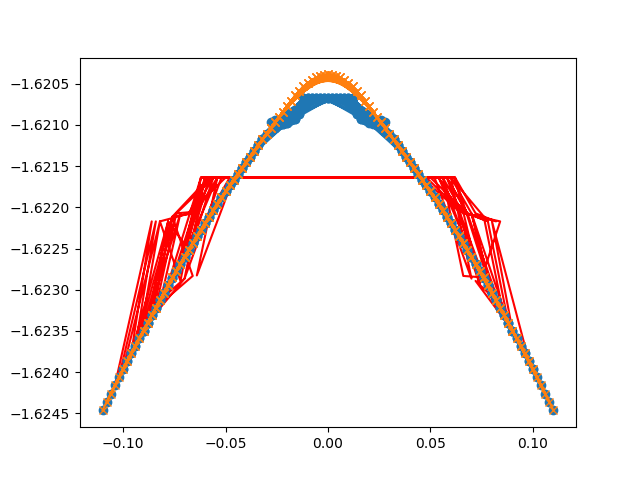

In [53]:
plt.figure()
plt.plot([i[0] for i in result_afm], [i[3] for i in result_afm], 'r-',\
         [i[0] for i in result_fm], [i[3] for i in result_fm], 'o-',\
         [i[0] for i in result_pm], [i[2] for i in result_pm], 'x-')
#plt.xlim([-0.2,0.2])
#plt.ylim([-1.625,-1.619])
#plt.axis([-2, 2, -2.51, -2.49])
plt.show()

In [ ]:
plt.figure()
#plt.plot(mu_array, -deriv_afm, 'r--')
plt.grid()
plt.plot(mu_array, -deriv_afm, 'o')
#,\
#         mu_array, -deriv_fm, 'b--',\
#         mu_array, -deriv_pm, 'm--')
#plt.axis([0, 6, 0, 20])
plt.show()